In [2]:
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

C:\Users\mattx\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **Real Estate Exploratory Data Analysis**

### This project examines a real estate dataset that provides insights into property sales and assessments across various towns. With features like 'Assessed Value,' 'Sale Amount,' and 'Sales Ratio,' the data captures critical aspects of property transactions, allowing us to explore patterns in pricing, property types, and regional trends. This analysis aims to identify trends, inconsistencies, and potential outliers in the real estate market to better understand factors that influence property values.

### To do so we will go through four steps: Data understanding, data preparation, feature understaning and feature relationship. 
### Finally we will attempt to answer this question: *Which year, town, property type and residential type should we chose to maximise the sale ratio (return the most profit)?*

### **Data Understanding**
Explore the different elements of the dataset

In [3]:
# We start by loading the data and displaying the data
df = pd.read_csv('Real_Estate_Sales_2001-2021_GL.csv')

C:\Users\mattx\AppData\Local\Temp\ipykernel_68364\1784679612.py:2: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Real_Estate_Sales_2001-2021_GL.csv')


In [4]:
# Dislplay first entries
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,NaN,NaN,NaN,NaN


In [5]:
# Display last entries
df.tail()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
1054154,21073,2021,11/16/2021,Watertown,50 SUMMIT RIDGE,263100.0,430000.0,0.6118,Residential,Single Family,NaN,NaN,NaN,POINT (-73.114796995 41.586332992)
1054155,210900013,2021,09/20/2022,Woodbury,89 TAMARACK LANR UNIT 89A,79810.0,200000.0,0.3990,Residential,Condo,NaN,NaN,NaN,POINT (-73.232741957 41.517140075)
1054156,210500004,2021,05/06/2022,Woodbury,69 BACON POND ROAD,79590.0,360000.0,0.2210,Vacant Land,NaN,NaN,NaN,NaN,POINT (-73.19129028 41.543605165)
1054157,211130,2021,06/29/2022,West Haven,114 TUTHILL ST,117600.0,275000.0,0.4276,Residential,Single Family,NaN,NaN,NaN,POINT (-72.976176996 41.28158799)
1054158,210374,2021,04/26/2022,Windsor,200 BLOOMFIELD AVE,130690.0,190000.0,0.6878,Commercial,NaN,NaN,NaN,NaN,POINT (-72.653117996 41.852399996)


In [6]:
#Number of input values, number of features
df.shape

(1054159, 14)

In [7]:
#Show null value counts
null_counts = df.isnull().sum()
print('Null Counts\n\n' ,null_counts, '\n')

Null Counts

 Serial Number             0
List Year                 0
Date Recorded             2
Town                      0
Address                  51
Assessed Value            0
Sale Amount               0
Sales Ratio               0
Property Type        382446
Residential Type     393884
Non Use Code         751917
Assessor Remarks     892687
OPM remarks         1042595
Location             799516
dtype: int64 



In [8]:
#Show all different data types
print('Data Types\n\n' ,df.dtypes)

Data Types

 Serial Number         int64
List Year             int64
Date Recorded        object
Town                 object
Address              object
Assessed Value      float64
Sale Amount         float64
Sales Ratio         float64
Property Type        object
Residential Type     object
Non Use Code         object
Assessor Remarks     object
OPM remarks          object
Location             object
dtype: object


In [9]:
#Show all lines with duplicat values
df.loc[df.duplicated()]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location


In [10]:
#Show all features (columns)
print('Dataset Features =\n', df.columns)

Dataset Features =
 Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location'],
      dtype='object')


In [11]:
#Summary and description of values in dataset
df.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,1.054159e+06,1.054159e+06,1.054159e+06,1.054159e+06,1.054159e+06
mean,5.027140e+05,2.010774e+03,2.797416e+05,3.990286e+05,9.953241e+00
std,7.230239e+06,6.540711e+00,1.650117e+06,5.229758e+06,1.838434e+03
min,0.000000e+00,2.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.055200e+04,2.004000e+03,8.845000e+04,1.422000e+05,4.816008e-01
50%,8.008000e+04,2.011000e+03,1.395800e+05,2.300000e+05,6.162887e-01
75%,1.608155e+05,2.017000e+03,2.270000e+05,3.700000e+05,7.764000e-01
max,2.000500e+09,2.021000e+03,8.815100e+08,5.000000e+09,1.226420e+06


### **Data Preparation/Cleaning**
Clean and preprocess the data by handling missing values, removing duplicates, and transforming variables to ensure it is ready for analysis.

In [12]:
#Drop irrelevant columns that are beleived to add no substance to our research
df = df.drop(['Non Use Code','Assessor Remarks','OPM remarks','Location'], axis=1)
df

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family
...,...,...,...,...,...,...,...,...,...,...
1054154,21073,2021,11/16/2021,Watertown,50 SUMMIT RIDGE,263100.0,430000.0,0.6118,Residential,Single Family
1054155,210900013,2021,09/20/2022,Woodbury,89 TAMARACK LANR UNIT 89A,79810.0,200000.0,0.3990,Residential,Condo
1054156,210500004,2021,05/06/2022,Woodbury,69 BACON POND ROAD,79590.0,360000.0,0.2210,Vacant Land,NaN
1054157,211130,2021,06/29/2022,West Haven,114 TUTHILL ST,117600.0,275000.0,0.4276,Residential,Single Family


In [13]:
#Convert Date from object to Date
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'])
years = df['Date Recorded'].dt.year
df.dtypes

Serial Number                int64
List Year                    int64
Date Recorded       datetime64[ns]
Town                        object
Address                     object
Assessed Value             float64
Sale Amount                float64
Sales Ratio                float64
Property Type               object
Residential Type            object
dtype: object

In [14]:
#Check again null counts of relevant features and decide action to take
null_counts = df.isnull().sum()
print('Null Counts\n\n' ,null_counts, '\n')

#All features that have missing values can not be replaced or extrapolated, therefore we will delete
df_cleaned = df.dropna()

#Confirm there are no more missing values
null_counts = df_cleaned.isnull().sum()
print('Null Counts\n\n' ,null_counts, '\n')

df = df_cleaned
print('Shape =\n', df.shape)

Null Counts

 Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    393884
dtype: int64 

Null Counts

 Serial Number       0
List Year           0
Date Recorded       0
Town                0
Address             0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
dtype: int64 

Shape =
 (660271, 10)


In [15]:
#find and remove outlier values
column_name = 'Sale Amount'

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
print(df.shape)

(660271, 10)


### **Feature Understanding**
Examine the individual features of the dataset to understand their distributions, characteristics, and potential influence on property sales and assessments.

In [16]:
#List which years had the most property lists
df['List Year'].value_counts()

2020    60728
2019    54326
2021    51371
2018    46505
2016    45851
2014    45461
2006    43290
2015    42777
2017    41792
2009    39023
2013    36304
2012    32725
2007    31827
2010    30164
2008    30104
2011    28023
Name: List Year, dtype: int64

Text(0, 0.5, 'Count')

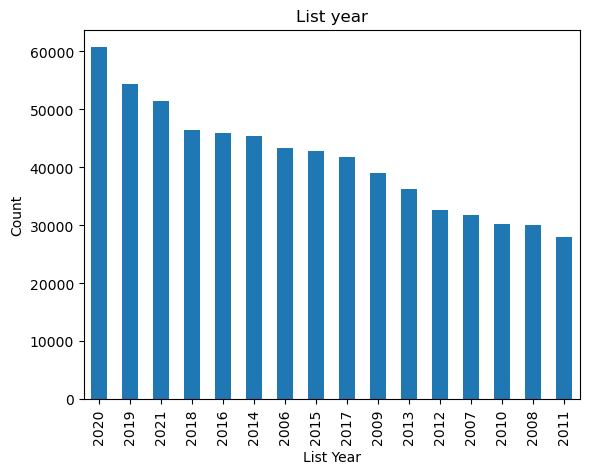

In [17]:
#Plotting the list year counts
ax = df['List Year'].value_counts() \
    .plot(kind='bar', title='List year')
ax.set_xlabel('List Year')
ax.set_ylabel('Count')

In [18]:
#List which towns had the most real estate properties
df['Town'].value_counts()

Bridgeport       20235
Waterbury        19908
Stamford         19407
Norwalk          16158
Danbury          13543
                 ...  
Franklin           291
Scotland           281
Canaan             281
Union              123
***Unknown***        1
Name: Town, Length: 170, dtype: int64

Text(0, 0.5, 'Count')

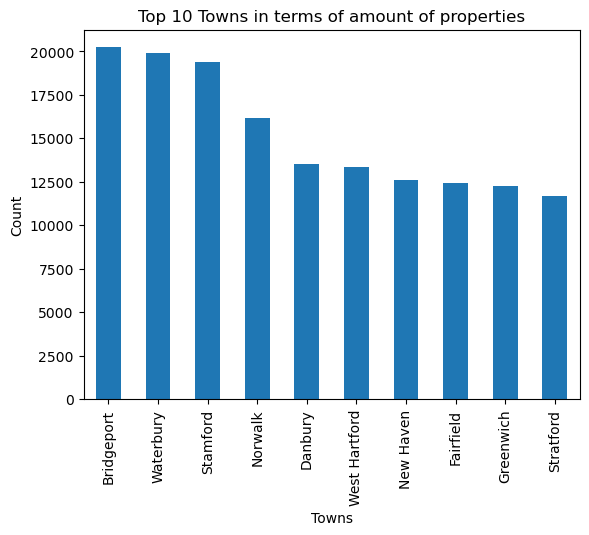

In [19]:
#plot the value_counts for the top 10 towns
ax = df['Town'].value_counts().head(10) \
    .plot(kind='bar', title='Top 10 Towns in terms of amount of properties')

ax.set_xlabel('Towns')
ax.set_ylabel('Count')

In [20]:
#List the most frequent property types
df['Property Type'].value_counts()

Single Family    401610
Residential      112099
Condo            105419
Two Family        26407
Three Family      12586
Four Family        2150
Name: Property Type, dtype: int64

Text(0, 0.5, 'Counts')

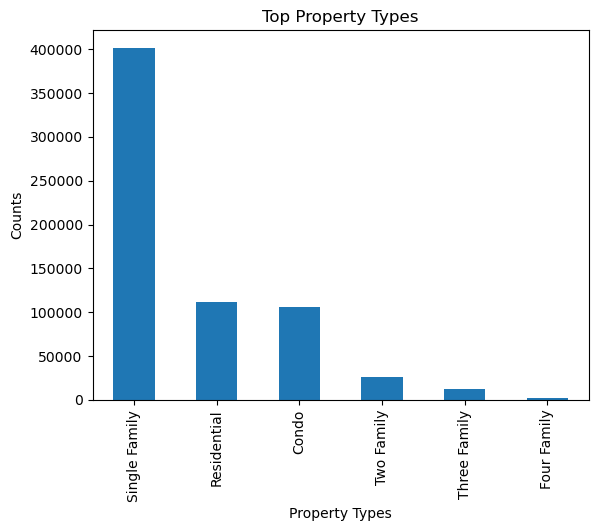

In [21]:
#Plot the counts of property types
ax = df['Property Type'].value_counts() \
    .plot(kind='bar', title='Top Property Types')

ax.set_xlabel('Property Types')
ax.set_ylabel('Counts')

In [22]:
#List the most frequent Residential types
df['Residential Type'].value_counts()

Single Family    480564
Condo            128788
Two Family        32614
Three Family      15542
Four Family        2763
Name: Residential Type, dtype: int64

Text(0, 0.5, 'Count')

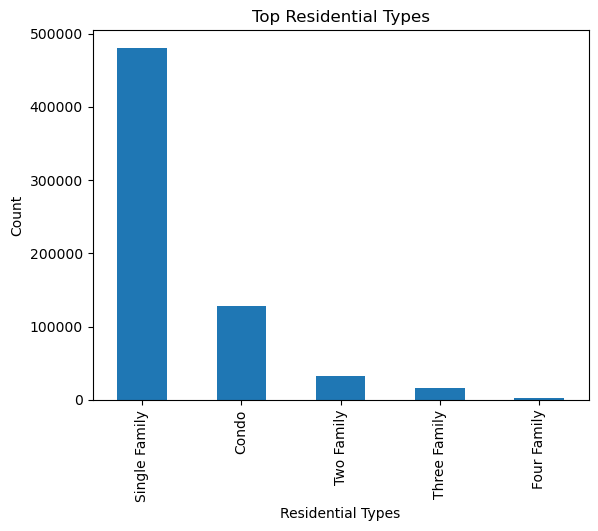

In [23]:
#plot the most frequent Residential types
ax = df['Residential Type'].value_counts() \
    .plot(kind='bar', title='Top Residential Types')
ax.set_xlabel('Residential Types')
ax.set_ylabel('Count')

In [24]:
df

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020177,2020,2021-04-14,Ansonia,323 BEAVER ST,133000.0,248400.0,0.535400,Residential,Single Family
1,2020225,2020,2021-05-26,Ansonia,152 JACKSON ST,110500.0,239900.0,0.460600,Residential,Three Family
3,2020090,2020,2020-12-14,Ansonia,57 PLATT ST,127400.0,202500.0,0.629100,Residential,Two Family
4,200500,2020,2021-09-07,Avon,245 NEW ROAD,217640.0,400000.0,0.544100,Residential,Single Family
5,200121,2020,2020-12-15,Avon,63 NORTHGATE,528490.0,775000.0,0.681900,Residential,Single Family
...,...,...,...,...,...,...,...,...,...,...
1054152,210282,2021,2022-03-22,Westport,140 EASTON ROAD,1155800.0,1960000.0,0.589694,Residential,Single Family
1054153,2100471,2021,2022-08-03,Wethersfield,181 FOREST DR,137400.0,230000.0,0.597300,Residential,Single Family
1054154,21073,2021,2021-11-16,Watertown,50 SUMMIT RIDGE,263100.0,430000.0,0.611800,Residential,Single Family
1054155,210900013,2021,2022-09-20,Woodbury,89 TAMARACK LANR UNIT 89A,79810.0,200000.0,0.399000,Residential,Condo


250059.07888579083


<AxesSubplot:title={'center':'Sales Ratio'}, ylabel='Frequency'>

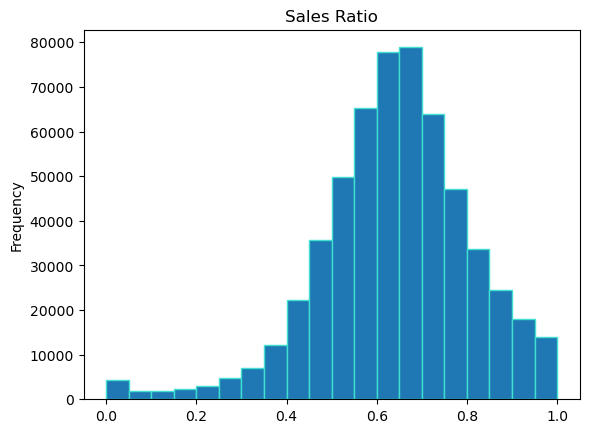

In [25]:
#Distribution of Sales Ratio
ass_mean = df['Assessed Value'].mean()
print(ass_mean)
df['Sales Ratio'].plot(kind='hist',
                      title= 'Sales Ratio',
                      bins = 20,
                      range=(0, 1),
                      edgecolor = 'turquoise')

<AxesSubplot:title={'center':'Assessed Value Distribution'}, ylabel='Density'>

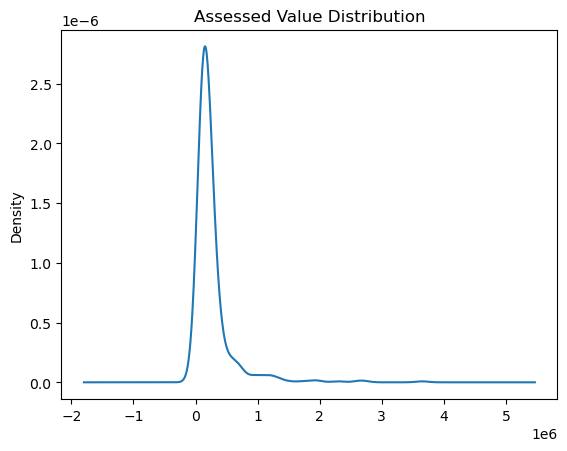

In [26]:
#Distribution of the asseessed value
df['Assessed Value'][:500].plot(
    kind = 'kde',
    title = 'Assessed Value Distribution')

### **Feature Relationships**
Analyze the relationships between different features through correlation and visualization.

Text(0.5, 1.0, 'Assessed Value vs Sale Amount')

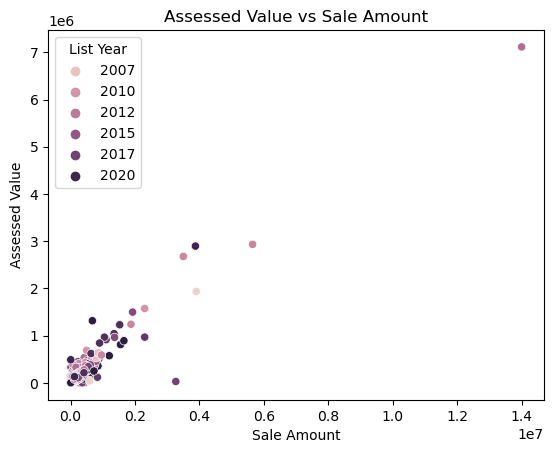

In [27]:
#Plot the assessed value vs the sale amount
shuffled_df = df.sample(frac=1).reset_index(drop=True) #Shufffle Data
ax = sns.scatterplot(y='Assessed Value',
                x= 'Sale Amount',
                data=shuffled_df[:500],
               hue= 'List Year',
               )
ax.set_title('Assessed Value vs Sale Amount')

In [28]:
#Find the correlation between all numerical values
df_corr = df[['Assessed Value','Sale Amount','Sales Ratio']].corr()
df_corr

,Assessed Value,Sale Amount,Sales Ratio
Assessed Value,1.000000,0.166313,0.001635
Sale Amount,0.166313,1.000000,-0.001066
Sales Ratio,0.001635,-0.001066,1.000000


<AxesSubplot:>

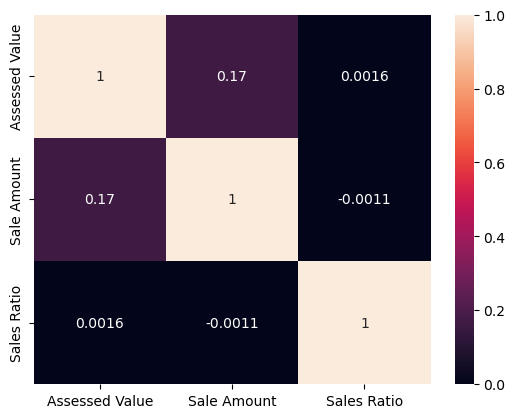

In [29]:
#Heatmap correlation between features
sns.heatmap(df_corr, annot=True)

Now that the data is pre analyzed, we will attempt to answer the question:
How do assessed values compare to actual sale amounts across the top towns (in terms of property count) and property types. How does the sale ratio evolve over the years and what factors influence the sale ratio? And finally, If we want to build a building that will sell the most profitable, what town and which property type should we chose? Will listing in 2024 give us a better sales ratio?

Text(0.5, 1.0, 'Assessed Amount vs Sale Amount (top 5 towns)')

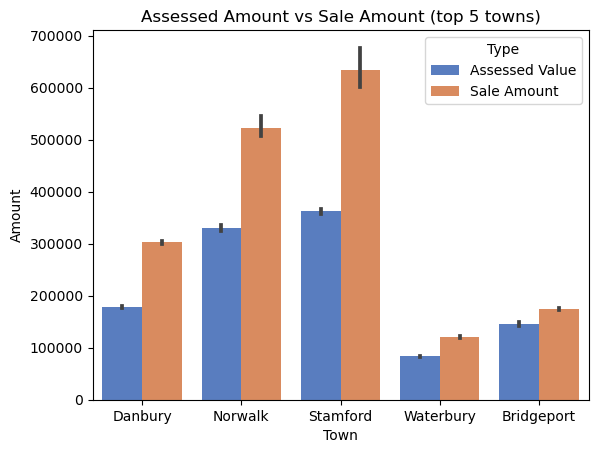

In [30]:
#Compare the assessed value and sale amount in top 5 towns that have the most listing
top_towns = df['Town'].value_counts().head(5)
top_town_names = top_towns.index
df_top_towns = df[df['Town'].isin(top_town_names)]
df_top_towns

df_top_towns_melted = pd.melt(df_top_towns, id_vars='Town', \
                              value_vars=['Assessed Value','Sale Amount'], \
                              var_name='Type', value_name='Amount')

ax = sns.barplot(x='Town', y='Amount', hue='Type', data=df_top_towns_melted, palette='muted')
ax.set_title('Assessed Amount vs Sale Amount (top 5 towns)')

[Text(0, 0, 'Residential'),
 Text(1, 0, 'Condo'),
 Text(2, 0, 'Two Family'),
 Text(3, 0, 'Single Family'),
 Text(4, 0, 'Three Family'),
 Text(5, 0, 'Four Family')]

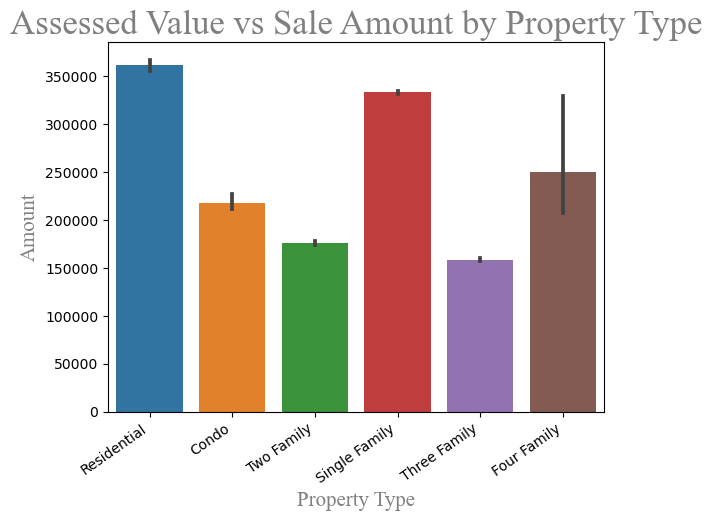

In [31]:
#Compare the assessed value to the Sale amount for each property type
custom_palette = sns.color_palette("coolwarm", as_cmap=False)

df_property_melted = pd.melt(df, id_vars='Property Type', \
                              value_vars=['Assessed Value','Sale Amount'], \
                              var_name='Type', value_name='Amount')

ax = sns.barplot(x='Property Type', y='Amount', data=df_property_melted)
ax.set_xlabel('Property Type', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': 15})
ax.set_ylabel('Amount', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': 15})
ax.set_title('Assessed Value vs Sale Amount by Property Type', fontdict={'fontname': 'Times New Roman', 'color': 'gray', 'fontsize': 25})

ax.set_xticklabels(ax.get_xticklabels(), rotation=35, horizontalalignment='right')

<AxesSubplot:xlabel='List Year'>

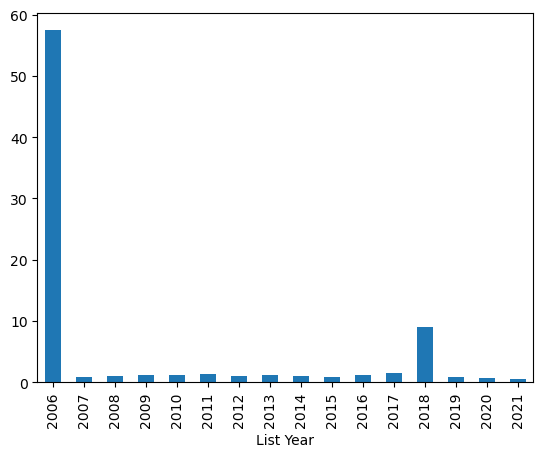

In [32]:
#Show the evolution of the sales ratio throughout the years 
df.groupby('List Year')['Sales Ratio'].mean().plot(kind='bar')

<AxesSubplot:xlabel='List Year'>

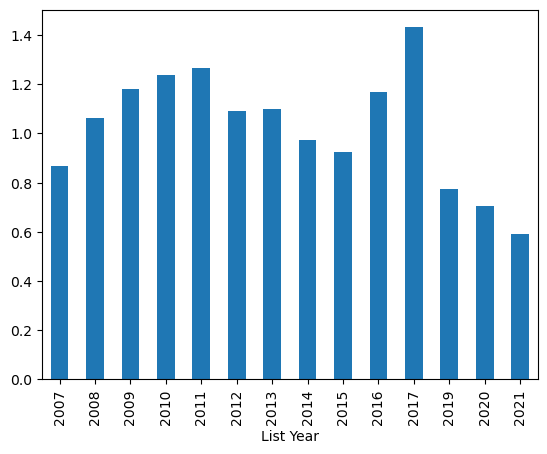

In [33]:
#Show the evolution of the sales ratio throughout the years without the two peak years
df.query('`List Year` != 2006 and `List Year` != 2018').groupby('List Year')['Sales Ratio'].mean().plot(kind='bar')

<AxesSubplot:xlabel='List Year'>

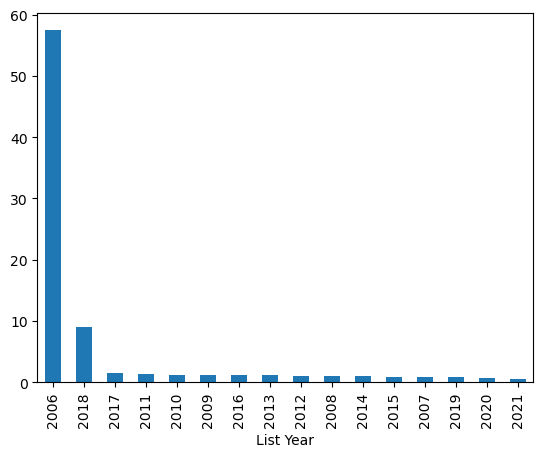

In [34]:
#Show the evolution of the sales in descending order
df.groupby('List Year')['Sales Ratio'].mean().sort_values(ascending=False).plot(kind='bar')

Text(0.5, 1.0, 'Feature Importance in Predicting Sales Ratio')

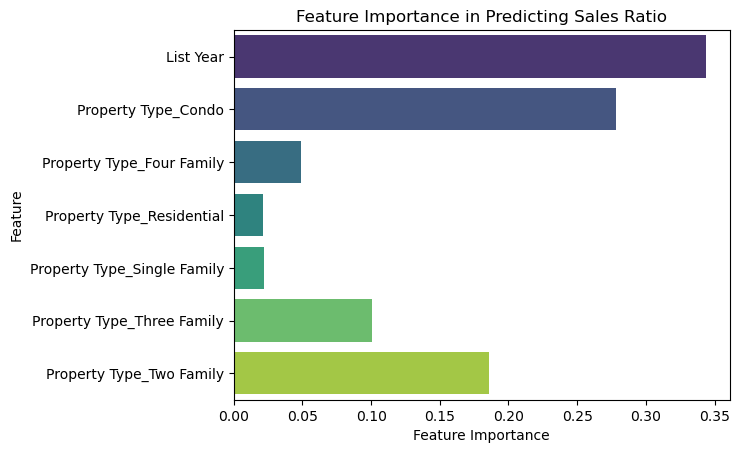

In [34]:
# Define features and target variable
X = df.drop(['Assessed Value','Sale Amount','Serial Number','Sales Ratio','Date Recorded','Town','Address','Residential Type'], axis=1)
X_encoded = pd.get_dummies(X, columns=['Property Type'])
y = df['Sale Amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X_encoded.columns

# Plot feature importances
ax = sns.barplot(x=importances, y=feature_names, palette='viridis')
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance in Predicting Sales Ratio')

Which year, town, property type and residential type should we chose to maximise the sale ratio (return the most profit). We already know from earlier in the analysis that in 2006 we seen the highest sales ratio as it was a peek in the home selling district. Therefore the next step is to find which town had the highest sales ratio in 2006, and so on and so forth.


Text(0, 0.5, 'Sales Ratio')

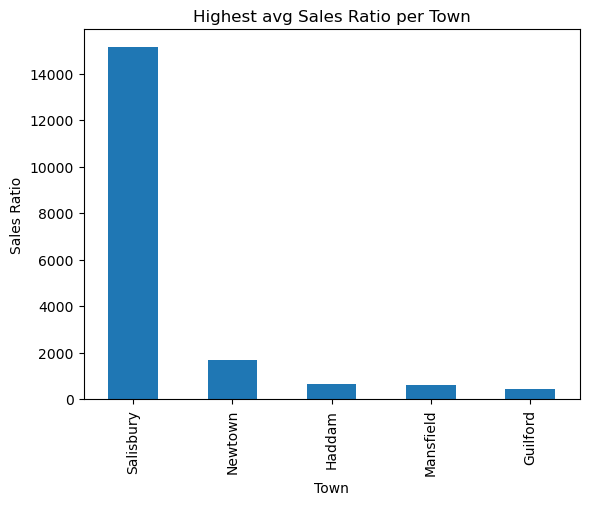

In [35]:
#Find the Town with the highest sales ratio in 2006
ax = df.query('`List Year` == 2006') \
     .groupby('Town')['Sales Ratio'] \
     .mean().sort_values(ascending=False).head(5). \
     plot(kind='bar', title='Highest avg Sales Ratio per Town')
ax.set_xlabel('Town')
ax.set_ylabel('Sales Ratio')

Text(0, 0.5, 'Sales Ratio')

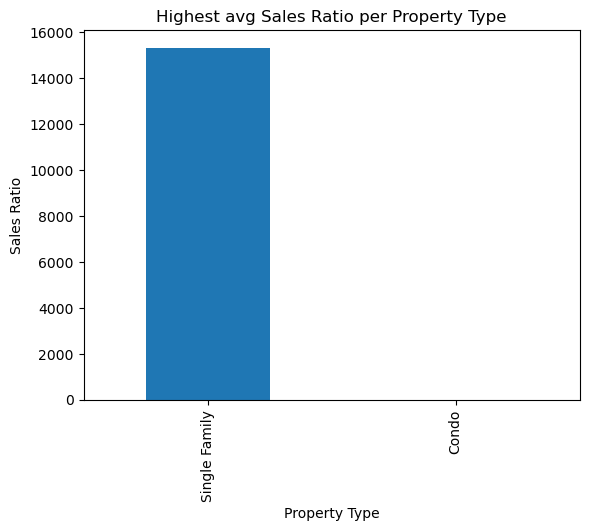

In [36]:
#Find which property type in 2006 in the town of Salisbury has the highest sales ratio
ax = df.query('`List Year` == 2006 and Town == "Salisbury"'). \
            groupby('Property Type')['Sales Ratio']. \
            mean().sort_values(ascending=False).head(5). \
            plot(kind='bar', title='Highest avg Sales Ratio per Property Type')
ax.set_xlabel('Property Type')
ax.set_ylabel('Sales Ratio')

Text(0, 0.5, 'Sales Ratio')

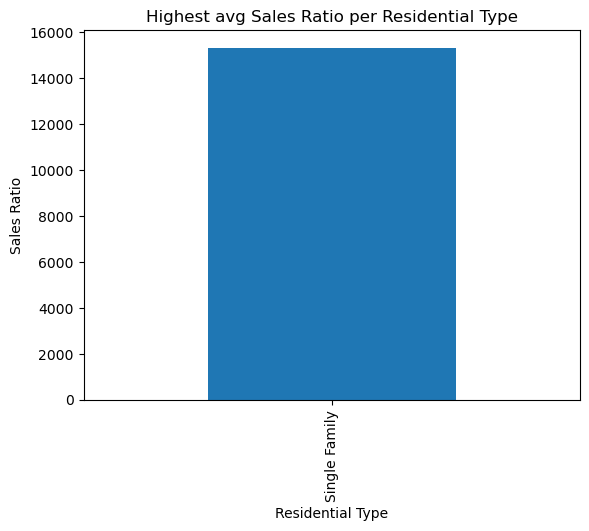

In [37]:
#Find which residential type in a single property type home in 2006 in the town of Salisbury has the highest sales ratio
ax = df.query('`List Year` == 2006 and Town == "Salisbury" and `Property Type` == "Single Family"'). \
            groupby('Property Type')['Sales Ratio']. \
            mean().sort_values(ascending=False).head(5). \
            plot(kind='bar', title='Highest avg Sales Ratio per Residential Type')
ax.set_xlabel('Residential Type')
ax.set_ylabel('Sales Ratio')

We can see that based on this data, The best year to be in the market was 2006, in which the town of Salisbury, a single family home will net you the highest sales ratio.